# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url =f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()
        
#     # Run an API request for each of the cities
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
           
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        # Append null values
        print("City not found. Skipping...")
        pass
    
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | acapulco de juarez
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | krasnogvardeyskoye
Processing Record 6 of Set 1 | kudat
Processing Record 7 of Set 1 | gardabani
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | melo
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | paita
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | iskateley
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | kamina
Processing Record 17 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | howrah
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | kismayo
Processing Record 22 of Set

City not found. Skipping...
Processing Record 43 of Set 4 | minas de marcona
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | san antonio de pale
Processing Record 46 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 47 of Set 4 | dwarka
Processing Record 48 of Set 4 | jidong
Processing Record 49 of Set 4 | happy valley-goose bay
Processing Record 50 of Set 4 | utena
Processing Record 1 of Set 5 | qui nhon
Processing Record 2 of Set 5 | arraias
Processing Record 3 of Set 5 | cozumel
Processing Record 4 of Set 5 | labrador city
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | viligili
City not found. Skipping...
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | arar
Processing Record 9 of Set 5 | greymouth
Processing Record 10 of Set 5 | tomohon
Processing Record 11 of Set 5 | hobyo
Processing Record 12 of Set 5 | buka
Processing Record 13 of Set 5 | kavieng
Processing Record 14 of Set 5 | atambua
Process

Processing Record 34 of Set 8 | manokwari
Processing Record 35 of Set 8 | kisangani
Processing Record 36 of Set 8 | selfoss
Processing Record 37 of Set 8 | cable beach
City not found. Skipping...
Processing Record 38 of Set 8 | san pedro pochutla
Processing Record 39 of Set 8 | yaiza
Processing Record 40 of Set 8 | georgiyevka
Processing Record 41 of Set 8 | bengkulu
Processing Record 42 of Set 8 | bulgan
Processing Record 43 of Set 8 | jiangyou
Processing Record 44 of Set 8 | fort st. john
Processing Record 45 of Set 8 | akureyri
Processing Record 46 of Set 8 | aripuana
Processing Record 47 of Set 8 | salaga
Processing Record 48 of Set 8 | peronnas
Processing Record 49 of Set 8 | adre
Processing Record 50 of Set 8 | ceres
Processing Record 1 of Set 9 | comilla
Processing Record 2 of Set 9 | fortuna
Processing Record 3 of Set 9 | ta`u
Processing Record 4 of Set 9 | alaghsas
Processing Record 5 of Set 9 | island harbour
Processing Record 6 of Set 9 | kostroma
Processing Record 7 of Set 

Processing Record 23 of Set 12 | monrovia
Processing Record 24 of Set 12 | zaragoza
Processing Record 25 of Set 12 | neryungri
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | fukuecho
Processing Record 28 of Set 12 | barcelos
Processing Record 29 of Set 12 | masterton
Processing Record 30 of Set 12 | rimouski
Processing Record 31 of Set 12 | kirkwall
Processing Record 32 of Set 12 | severo-yeniseyskiy
Processing Record 33 of Set 12 | piacabucu
Processing Record 34 of Set 12 | hauterive
Processing Record 35 of Set 12 | pokachi
Processing Record 36 of Set 12 | mingyue
Processing Record 37 of Set 12 | baruun-urt
Processing Record 38 of Set 12 | brits
Processing Record 39 of Set 12 | nadi
Processing Record 40 of Set 12 | matam
Processing Record 41 of Set 12 | torghay
Processing Record 42 of Set 12 | wenatchee
Processing Record 43 of Set 12 | ambalavao
Processing Record 44 of Set 12 | marsh harbour
Processing Record 45 of Set 12 | likasi
Processing Record 46 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,292.28,79,96,6.68,PN,1691119029
1,port-aux-francais,-49.3500,70.2167,275.64,92,60,15.97,TF,1691119029
2,acapulco de juarez,16.8634,-99.8901,302.05,79,75,3.09,MX,1691119029
3,wailua homesteads,22.0669,-159.3780,301.59,75,40,7.20,US,1691119030
4,krasnogvardeyskoye,45.8456,41.5186,293.27,80,3,1.67,RU,1691119030


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,292.28,79,96,6.68,PN,1691119029
1,port-aux-francais,-49.3500,70.2167,275.64,92,60,15.97,TF,1691119029
2,acapulco de juarez,16.8634,-99.8901,302.05,79,75,3.09,MX,1691119029
3,wailua homesteads,22.0669,-159.3780,301.59,75,40,7.20,US,1691119030
4,krasnogvardeyskoye,45.8456,41.5186,293.27,80,3,1.67,RU,1691119030


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

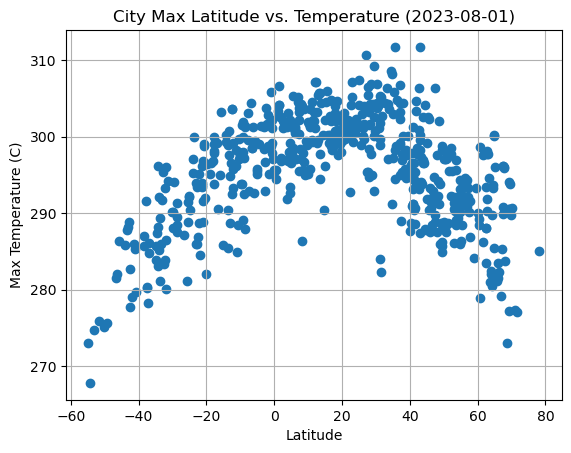

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-08-01)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

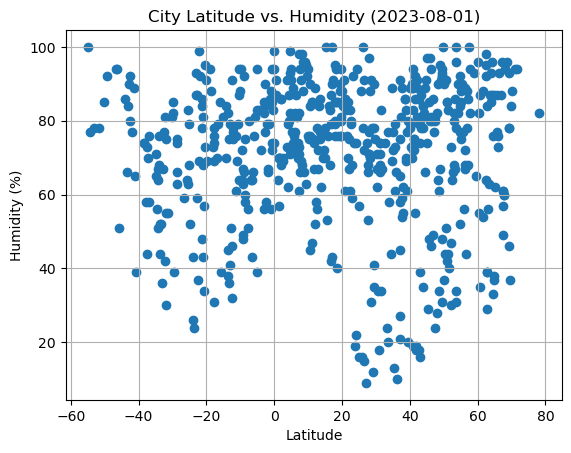

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-01)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

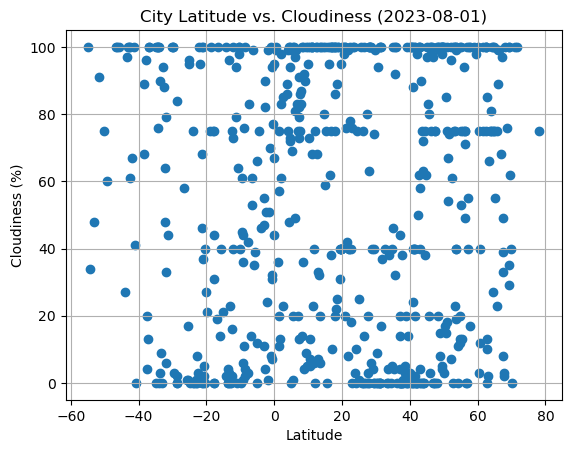

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-01)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

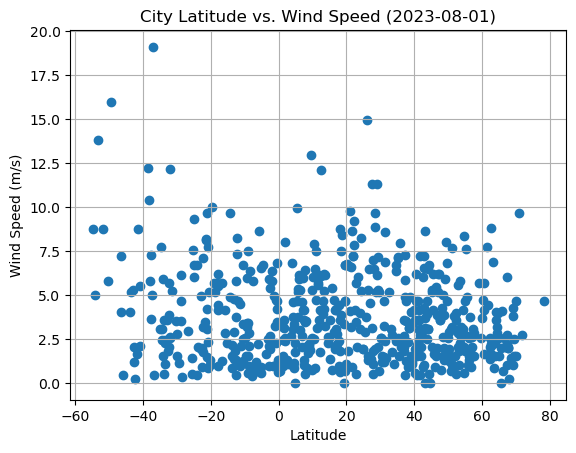

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-01)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, title, x_label, y_label,line_eq_pos=(10,277)):
    # Calculate the correlation
    correlation = round(st.pearsonr(x_values,y_values)[0],2)

    # Calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Gernerate scatter chart with liner regression line, equation of line, r-squared value
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, 'r-')

    # Plot the Annotation in the graph 
    plt.annotate(line_eq,line_eq_pos,fontsize=11,color="red")

    # Define title and x/y labels
    plt.title(title, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f'The r-value is: {rvalue}')
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,acapulco de juarez,16.8634,-99.8901,302.05,79,75,3.09,MX,1691119029
3,wailua homesteads,22.0669,-159.3780,301.59,75,40,7.20,US,1691119030
4,krasnogvardeyskoye,45.8456,41.5186,293.27,80,3,1.67,RU,1691119030
5,kudat,6.8837,116.8477,305.11,70,20,2.68,MY,1691119030
6,gardabani,41.4605,45.0928,294.20,86,100,2.44,GE,1691119030


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,292.28,79,96,6.68,PN,1691119029
1,port-aux-francais,-49.3500,70.2167,275.64,92,60,15.97,TF,1691119029
8,melo,-32.3667,-54.1833,283.34,77,88,3.88,UY,1691119031
9,puerto natales,-51.7236,-72.4875,275.84,78,91,8.76,CL,1691119031
10,paita,-5.0892,-81.1144,295.04,83,0,6.52,PE,1691119031


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6240136868037219


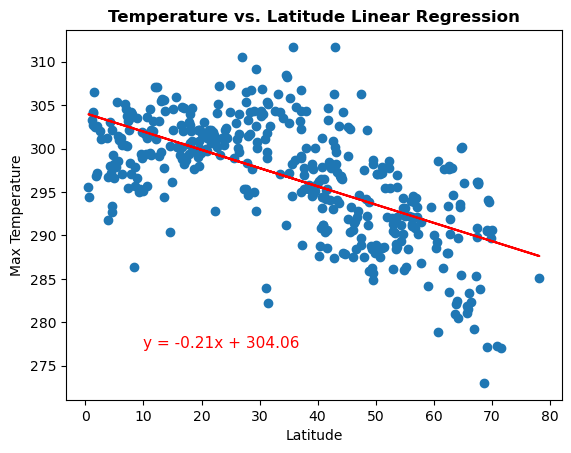

In [15]:
# Linear regression on Northern Hemisphere
title='Temperature vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Max Temperature'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], title, x_label, y_label)

The r-value is: 0.7918486498817662


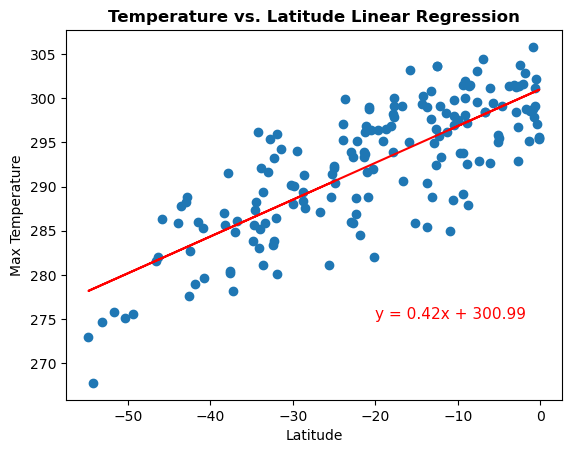

In [16]:
# Linear regression on Southern Hemisphere
title='Temperature vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Max Temperature'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], title, x_label, y_label,(-20,275))

**Discussion about the linear relationship:** 
There is a moderatre negative correlation between temperature and latitude in the nothern hemisphere while
there is a very strong positive correlation between temperature and latitude in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07902736845746992


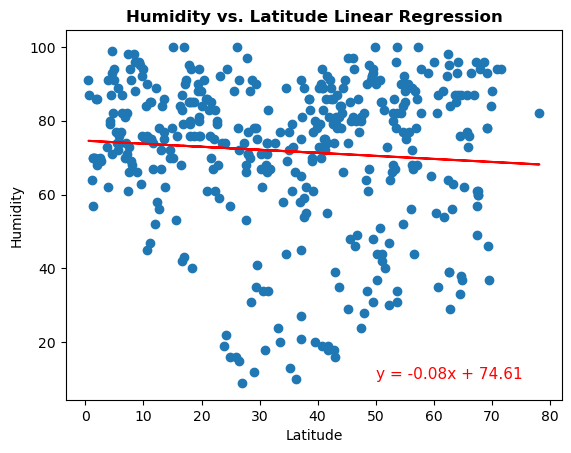

In [17]:
# Northern Hemisphere
title='Humidity vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Humidity'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], title, x_label, y_label,(50,10))

The r-value is: 0.026224757139176026


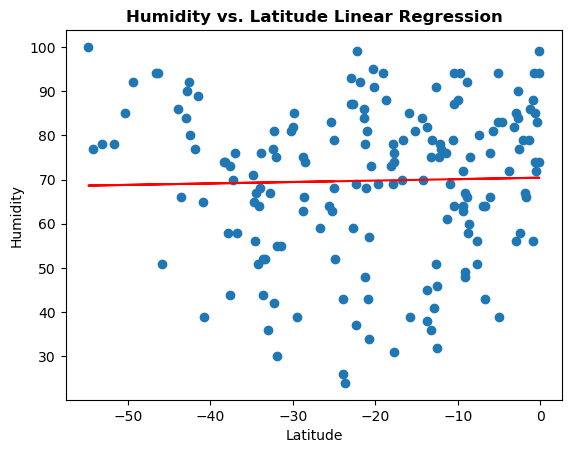

In [18]:
# Southern Hemisphere
title='Humidity vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Humidity'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], title, x_label, y_label,(-20,10))

**Discussion about the linear relationship:** 
There is no or very weak negative correlation between humidity and latitude in the nothern hemisphere while
there is a very weak positive correlation between temperature and latitude in southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.042013670880811135


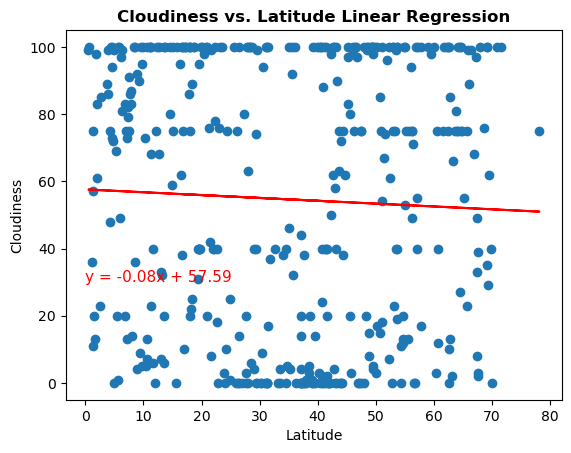

In [19]:
# Northern Hemisphere
title='Cloudiness vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Cloudiness'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], title, x_label, y_label,(0,30))

The r-value is: -0.18417622084697463


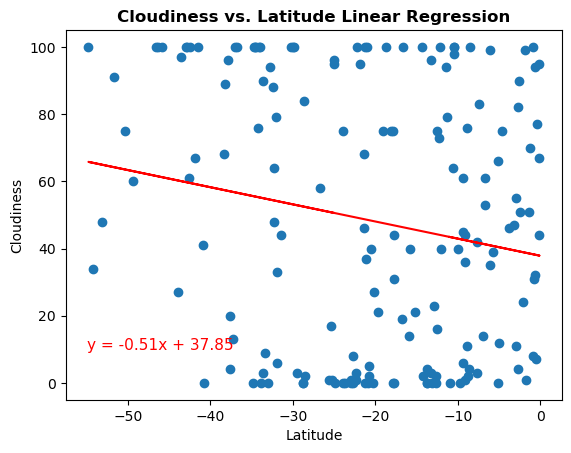

In [20]:
# Southern Hemisphere
title='Cloudiness vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Cloudiness'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], title, x_label, y_label,(-55,10))

**Discussion about the linear relationship:** There is None or very weak negative correlation between Cloudiness and latitude in both hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13803625045614987


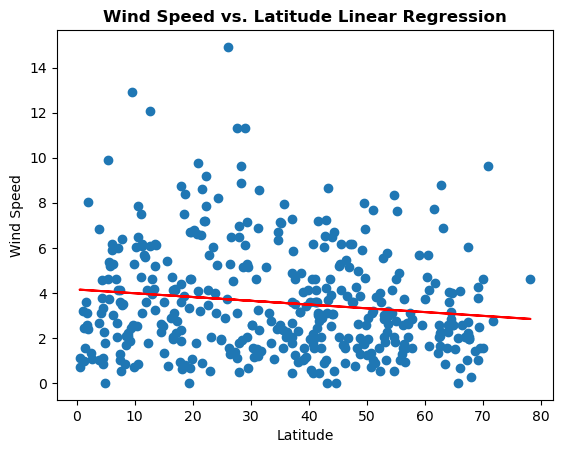

In [21]:
# Northern Hemisphere
title='Wind Speed vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Wind Speed'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], title, x_label, y_label,(40,22))

The r-value is: -0.279785432609411


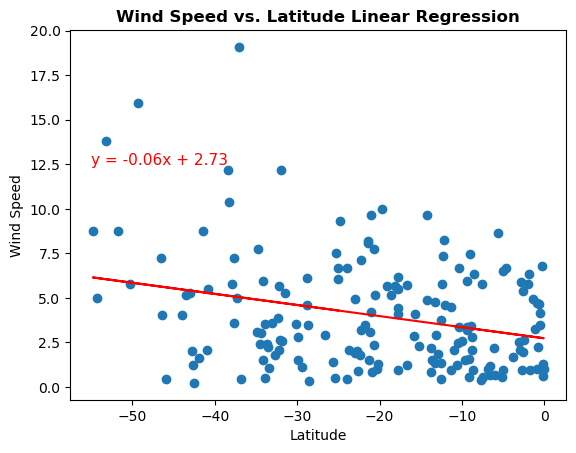

In [22]:
# Southern Hemisphere
title='Wind Speed vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Wind Speed'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], title, x_label, y_label,(-55,12.5))

**Discussion about the linear relationship:** 
There is no or very weak negative correlation between wind speed and latitude in the nothern and southern hemisphere .